<a href="https://colab.research.google.com/github/sevginurbilgin/EDA/blob/main/FeatureExtraction_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Extraction

In [ ]:
while True:pass

KeyboardInterrupt: ignored

In [ ]:
!pip install heartpy
!pip install neurokit2
!pip install h5py
!pip install shap
!pip install mrmr_selection
!pip install tensorflow
import numpy as np
import os
import scipy.stats
import heartpy as hp
import pandas as pd
import matplotlib.pyplot as plt
from natsort import natsorted
import neurokit2 as nk
import pickle
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, accuracy_score, f1_score, auc
import seaborn as sns
from sklearn.metrics import precision_recall_curve
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
import xgboost
import shap
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten
from keras.layers import LSTM
from keras.utils import to_categorical
from keras.optimizers import SGD
from sklearn.metrics import classification_report
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD
from keras.layers import BatchNormalization
from keras.layers import LSTM, Dense, BatchNormalization, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.4 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
main_path='/content/drive/MyDrive/8Haziran2023_veriler/StroopTest/'

output_path_graphs = '/content/drive/MyDrive/Tezim/CODE/8_Haziran/Analiz/GRAPHICS/'
output_path_features = '/content/drive/MyDrive/Tezim/CODE/8_Haziran/Analiz/FEATURES/'

output = '/content/drive/MyDrive/Tezim/CODE/8_Haziran/'

In [ ]:
with open(output+'Pickled_Data/'+'BVP_baseline.pkl', 'rb') as file:
    BVP_baseline = pickle.load(file)
with open(output+'Pickled_Data/'+'EDA_baseline.pkl', 'rb') as file:
    EDA_baseline = pickle.load(file)
with open(output+'Pickled_Data/'+'ST_baseline.pkl', 'rb') as file:
    ST_baseline = pickle.load(file)

with open(output+'Pickled_Data/'+'BVP_stroop.pkl', 'rb') as file:
    BVP_stroop = pickle.load(file)
with open(output+'Pickled_Data/'+'EDA_stroop.pkl', 'rb') as file:
    EDA_stroop = pickle.load(file)
with open(output+'Pickled_Data/'+'ST_stroop.pkl', 'rb') as file:
    ST_stroop = pickle.load(file)

with open(output+'Pickled_Data/'+'BVP_ns.pkl', 'rb') as file:
    BVP_ns = pickle.load(file)
with open(output+'Pickled_Data/'+'EDA_ns.pkl', 'rb') as file:
    EDA_ns = pickle.load(file)
with open(output+'Pickled_Data/'+'ST_ns.pkl', 'rb') as file:
    ST_ns = pickle.load(file)

In [ ]:
toplu_dfs_wo_id = [EDA_baseline,EDA_stroop,EDA_ns]
toplu_dfs_wo_id

[[            0
  72   0.447131
  73   0.445850
  74   0.447131
  75   0.457380
  76   0.457380
  ..        ...
  307  0.461224
  308  0.457380
  309  0.459942
  310  0.457380
  311  0.458661
  
  [240 rows x 1 columns],
              0
  62   0.163981
  63   0.161419
  64   0.162700
  65   0.162700
  66   0.160137
  ..        ...
  297  0.166543
  298  0.163981
  299  0.167824
  300  0.165262
  301  0.166543
  
  [240 rows x 1 columns],
              0
  63   3.018536
  64   3.003162
  65   2.968570
  66   2.953196
  67   2.935260
  ..        ...
  298  3.816101
  299  3.802008
  300  3.791759
  301  3.773822
  302  3.769979
  
  [240 rows x 1 columns],
              0
  59   0.285685
  60   0.289529
  61   0.286966
  62   0.288247
  63   0.290810
  ..        ...
  294  0.298496
  295  0.295934
  296  0.297215
  297  0.295934
  298  0.298496
  
  [240 rows x 1 columns],
               0
  57   14.512724
  58   14.430734
  59   14.334651
  60   14.312873
  61   14.293656
  ..         .

In [ ]:
# CSV dosyasını okuma
Features_eda_all = pd.read_csv(f'{output_path_features}/CSV/All_EDA_Features.csv')

In [ ]:
type(Features_eda_all)
EDA_baseline_DF = Features_eda_all[(Features_eda_all['Label'] == 0)].copy()
EDA_stroop_DF   = Features_eda_all[(Features_eda_all['Label'] == 1)].copy()
EDA_nostress_DF = Features_eda_all[(Features_eda_all['Label'] == 2)].copy()

EDA_baseline_DF = EDA_baseline_DF.drop (['Participant_Id'], axis=1).copy()
EDA_stroop_DF   = EDA_stroop_DF.drop   (['Participant_Id'], axis=1).copy()
EDA_nostress_DF = EDA_nostress_DF.drop (['Participant_Id'], axis=1).copy()

EDA_baseline_DF = EDA_baseline_DF.drop (['Label'], axis=1).copy()
EDA_stroop_DF   = EDA_stroop_DF.drop   (['Label'], axis=1).copy()
EDA_nostress_DF = EDA_nostress_DF.drop (['Label'], axis=1).copy()


In [ ]:
toplu_dfs = [EDA_baseline,EDA_stroop,EDA_ns]
for i in range(len(EDA_baseline)):
  EDA_baseline[i]['Label']=0
  EDA_stroop  [i]['Label']=1
  EDA_ns      [i]['Label']=2
  EDA_baseline[i]['Participant_Id']=i
  EDA_stroop  [i]['Participant_Id']=i
  EDA_ns      [i]['Participant_Id']=i
  EDA_baseline[i].columns = ['Value','Label','Participant_Id']
  EDA_stroop  [i].columns = ['Value','Label','Participant_Id']
  EDA_ns      [i].columns = ['Value','Label','Participant_Id']
np.shape(EDA_baseline)
EDA_baseline[0]


,Value,Label,Participant_Id
72,0.447131,0,0
73,0.445850,0,0
74,0.447131,0,0
75,0.457380,0,0
76,0.457380,0,0
...,...,...,...
307,0.461224,0,0
308,0.457380,0,0
309,0.459942,0,0
310,0.457380,0,0


# LSTM

In [ ]:
# Concatenate along a new axis (axis=1 in this example)
eda_total_df = np.concatenate([EDA_baseline, EDA_stroop, EDA_ns], axis=1)

# Create a DataFrame from the concatenated array
eda_total_df = pd.DataFrame(eda_total_df.reshape(-1, eda_total_df.shape[-1]))

# Resetting index after concatenation
eda_total_df.reset_index(drop=True, inplace=True)

eda_labels = eda_total_df[1].tolist()
eda_participants = eda_total_df[2].tolist()
eda_total_df = eda_total_df.drop(columns=[1, 2])
#0 = DEGER 1 = LABEL 2=PARTICIPANT

Features_eda_all
df = pd.DataFrame(Features_eda_all)
df = df.drop('Participant_Id', axis =1)

In [ ]:
eda_raw= eda_total_df
eda_raw_label = eda_labels
df = pd.DataFrame(eda_raw_label)
df1 = pd.DataFrame(eda_raw)

df1.to_csv(f'{output_path_features}/CSV/eda_raw.csv', index=False)  # index=False, indeks sütununu CSV'ye yazmamak içindf = pd.DataFrame(liste)

df.to_csv(f'{output_path_features}/CSV/eda_labels.csv', index=False)  # index=False, indeks sütununu CSV'ye yazmamak için


,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
17995,2.0
17996,2.0
17997,2.0
17998,2.0


In [ ]:
# Fix random seed for reproducibility
tf.random.set_seed(7)

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
eda_total_df_scaled = scaler.fit_transform(eda_total_df)
dataset=eda_total_df_scaled

In [ ]:
y_binary=df['Label']
y=df['Label']

# 'Label' sütununda 2 olan değerleri 0 ile değiştirelim
y_binary.loc[y_binary == 2] = 0
y_binary = to_categorical(y_binary)
y_binary


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
# Create feature matrix to feed into the LSTM model
X = df.drop('Label', axis =1).values
y = to_categorical(df['Label'])

# Scale the data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

# Separate the data into a 75% train / 25% test split.
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.25, random_state=36)
# Reshape the input variables to fit the expected input shape
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
 dataX, dataY = [], []
 for i in range(len(dataset)-look_back-1):
  a = dataset[i:(i+look_back), 0]
  dataX.append(a)
  dataY.append(dataset[i + look_back, 0])
 return np.array(dataX), np.array(dataY)

Best MODEL

In [ ]:
np.shape(X_train)

(3637, 1, 61)

In [ ]:
# There will be 15 neurons in the LSTM network, one for each input.
num_neurons = 15
num_features = 61

def get_new_model():

    # Create the model instance and define the network structure
    model = Sequential()
    model.add(LSTM(num_neurons, input_shape=(1, num_features), return_sequences=True))
    # Consider removing the Flatten() layer to maintain sequential information

    # Add Batch Normalization and Dropout between layers
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(num_neurons, activation='relu'))

    # Adjust the input shape for the second LSTM or other layers
    model.add(LSTM(num_neurons, activation="relu", return_sequences=False))
    # Add Batch Normalization and Dropout between layers
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(num_neurons, activation='relu'))
    model.add(Dense(3, activation='softmax'))

    return model

In [ ]:
# Learning rates to iterate over
lr_to_test = np.arange(0.01, 0.1, 0.01)

# Define early_stopping_monitor
#early_stopping_monitor = EarlyStopping(patience=2)

# Initialize variables recording score, accuracy, and Stop_epoch
score = np.zeros(len(lr_to_test))
acc = np.zeros(len(lr_to_test))
Stop_epoch = np.zeros(len(lr_to_test))

print('Training LSTM...')

batch_size = 5  # Adjust batch size as needed

# Loop over learning rates
for i, lr in enumerate(lr_to_test):
    print('\n\nTesting model with learning rate: %f\n' % lr)

    # Build new model to test, unaffected by previous models
    model = get_new_model()  # Assuming you have a function that returns a new, untrained model

    # Create SGD optimizer with specified learning rate
    my_optimizer = SGD(learning_rate=lr)

    # Build the optimizer with the model's trainable variables
    my_optimizer.build(model.trainable_variables)

    # Compile the model with the optimizer
    #model.compile(loss='categorical_crossentropy', optimizer=my_optimizer, metrics=['accuracy'])
    model.compile(loss='binary_crossentropy', optimizer=my_optimizer, metrics=['accuracy'])

    # Fit the model to the training data
    model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=100,
              validation_data=(X_test, y_test))#,
              #callbacks=[early_stopping_monitor])

    # Evaluate the fitted model using the accuracy metric
    score[i], acc[i] = model.evaluate(X_test, y_test, batch_size=batch_size)

    # Record the epoch where training was stopped for each learning rate
    #Stop_epoch[i] = early_stopping_monitor.stopped_epoch


Training LSTM...


Testing model with learning rate: 0.010000

Epoch 1/100
728/728 [==============================] - 10s 8ms/step - loss: 0.6218 - accuracy: 0.4550 - val_loss: 0.5848 - val_accuracy: 0.5045
Epoch 2/100
728/728 [==============================] - 7s 9ms/step - loss: 0.5894 - accuracy: 0.4911 - val_loss: 0.5689 - val_accuracy: 0.5309
Epoch 3/100
728/728 [==============================] - 5s 7ms/step - loss: 0.5840 - accuracy: 0.4853 - val_loss: 0.5697 - val_accuracy: 0.5194
Epoch 4/100
728/728 [==============================] - 5s 7ms/step - loss: 0.5777 - accuracy: 0.5150 - val_loss: 0.5616 - val_accuracy: 0.5045
Epoch 5/100
728/728 [==============================] - 6s 8ms/step - loss: 0.5750 - accuracy: 0.5029 - val_loss: 0.5597 - val_accuracy: 0.5359
Epoch 6/100
728/728 [==============================] - 6s 8ms/step - loss: 0.5727 - accuracy: 0.5205 - val_loss: 0.5617 - val_accuracy: 0.5095
Epoch 7/100
728/728 [==============================] - 5s 7ms/step - loss: 0.5

In [ ]:
# Let's look at a summary of the model
model.summary()
# Evaluate the fitted moel using the accuracy metric
scores, accu = model.evaluate(X_test, y_test, batch_size=batch_size)

print('score:', scores)
print('accuracy:', accu)

# Modelinizin tahminlerini yapın
y_pred_prob = model.predict(X_test)  # Sınıf olasılıklarını elde etmek için
y_pred = np.argmax(y_pred_prob, axis=1)  # En yüksek olasılığa sahip sınıfı seçmek için

# Gerçek etiketleri uygun biçime dönüştürün
y_test_cat = np.argmax(y_test, axis=1)  # One-hot encoded'i geri dönüştürmek için

# Classification raporu oluşturun
report = classification_report(y_test_cat, y_pred)
print(report)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 1, 15)             4620      
                                                                 
 batch_normalization_16 (Ba  (None, 1, 15)             60        
 tchNormalization)                                               
                                                                 
 dropout_16 (Dropout)        (None, 1, 15)             0         
                                                                 
 dense_24 (Dense)            (None, 1, 15)             240       
                                                                 
 lstm_17 (LSTM)              (None, 15)                1860      
                                                                 
 batch_normalization_17 (Ba  (None, 15)                60        
 tchNormalization)                                    

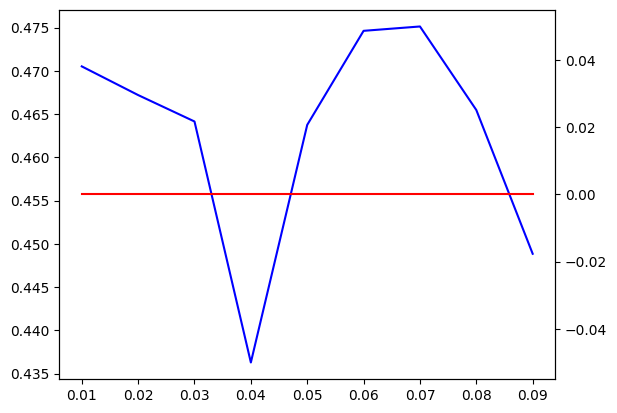

In [ ]:
fig, host = plt.subplots()
par1 = host.twinx()

p1, = host.plot(lr_to_test, score, "b-", label="Validation Loss")
p2, = par1.plot(lr_to_test, Stop_epoch, "r-", label="Stop Epoch")

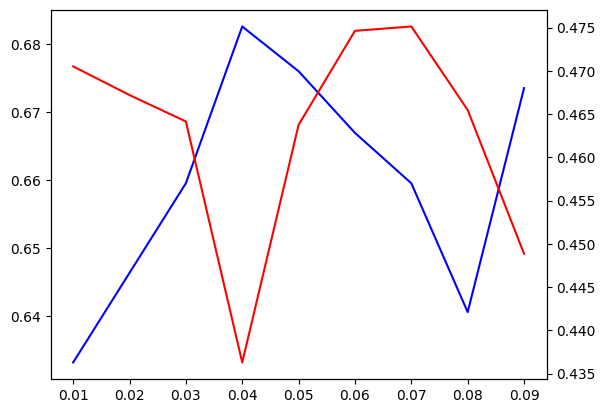

In [ ]:
fig, host = plt.subplots()
par1 = host.twinx()

p1, = host.plot(lr_to_test, acc, "b-", label="Accuracy")
p2, = par1.plot(lr_to_test, score, "r-", label="Stop Epoch")

In [ ]:
print('score:', score)
print('accuracy:', acc)

# Modelinizin tahminlerini yapın
y_pred_prob = model.predict(X_test)  # Sınıf olasılıklarını elde etmek için
y_pred = np.argmax(y_pred_prob, axis=1)  # En yüksek olasılığa sahip sınıfı seçmek için

# Gerçek etiketleri uygun biçime dönüştürün
y_test_cat = np.argmax(y_test, axis=1)  # One-hot encoded'i geri dönüştürmek için

# Classification raporu oluşturun
report = classification_report(y_test_cat, y_pred)
print(report)


score: [0.47050795 0.46719298 0.46413904 0.4362855  0.46374634 0.47461683
 0.4751201  0.46546471 0.44885027]
accuracy: [0.63314098 0.64633143 0.65952182 0.68260509 0.67600989 0.66694146
 0.65952182 0.64056057 0.67353666]
38/38 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.90      0.11      0.19       168
           1       0.70      0.74      0.72       577
           2       0.63      0.79      0.71       468

    accuracy                           0.67      1213
   macro avg       0.75      0.55      0.54      1213
weighted avg       0.70      0.67      0.64      1213



Tekli lstm

In [ ]:
print('Training LSTM...')

batch_size = 5 # I think I want to use batch_size = 10

# Now fit the model to the training data
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=200,
          validation_data=(X_test, y_test))

# Evaluate the fitted moel using the accuracy metric
score, acc = model.evaluate(X_test, y_test, batch_size=batch_size)

print('score:', score)
print('accuracy:', acc)

# Modelinizin tahminlerini yapın
y_pred_prob = model.predict(X_test)  # Sınıf olasılıklarını elde etmek için
y_pred = np.argmax(y_pred_prob, axis=1)  # En yüksek olasılığa sahip sınıfı seçmek için

# Gerçek etiketleri uygun biçime dönüştürün
y_test_cat = np.argmax(y_test, axis=1)  # One-hot encoded'i geri dönüştürmek için

# Classification raporu oluşturun
report = classification_report(y_test_cat, y_pred)
print(report)

Training LSTM...


NameError: ignored

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.88      0.21      0.34       168
           1       0.66      0.89      0.76       577
           2       0.70      0.59      0.64       468

    accuracy                           0.68      1213
   macro avg       0.74      0.56      0.58      1213
weighted avg       0.70      0.68      0.65      1213



In [ ]:
X

array([[0.00727476, 0.41087974, 0.0072783 , ..., 0.70434119, 0.05677185,
        0.66666667],
       [0.00728122, 0.41142446, 0.00728306, ..., 0.57174605, 0.04334705,
        0.33333333],
       [0.00729629, 0.41192349, 0.00728334, ..., 0.52887795, 0.0421311 ,
        0.66666667],
       ...,
       [0.00778358, 0.41199271, 0.00775209, ..., 0.36863288, 0.0592997 ,
        0.33333333],
       [0.00787831, 0.41164204, 0.00795413, ..., 0.65314798, 0.07387497,
        1.        ],
       [0.00778358, 0.41199271, 0.00775209, ..., 0.36863288, 0.0592997 ,
        0.33333333]])

binary

In [ ]:
# There will be 15 neurons in the LSTM network, one for each input.
num_neurons = 15
num_features = 61

def get_binary_model():

    # Create the model instance and define the network structure
    model = Sequential()
    model.add(LSTM(num_neurons, input_shape=(1, num_features), return_sequences=True))
    # Consider removing the Flatten() layer to maintain sequential information

    # Add Batch Normalization and Dropout between layers
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(num_neurons, activation='relu'))

    # Adjust the input shape for the second LSTM or other layers
    model.add(LSTM(num_neurons, activation="relu", return_sequences=False))
    # Add Batch Normalization and Dropout between layers
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(num_neurons, activation='relu'))
    model.add(Dense(2, activation='sigmoid'))

    return model


In [ ]:
# Separate the data into a 75% train / 25% test split.
X_train, X_test, y_train, y_test = \
    train_test_split(X, y_binary, test_size=0.25, random_state=36)
# Reshape the input variables to fit the expected input shape
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
print('Training LSTM...')
lr=0.03
    # Build new model to test, unaffected by previous models
#model = get_new_model()  # Assuming you have a function that returns a new, untrained model
model = get_binary_model()

    # Create SGD optimizer with specified learning rate
my_optimizer = SGD(learning_rate=lr)

    # Build the optimizer with the model's trainable variables
my_optimizer.build(model.trainable_variables)

    # Compile the model with the optimizer
    #model.compile(loss='categorical_crossentropy', optimizer=my_optimizer, metrics=['accuracy'])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


batch_size = 5 # I think I want to use batch_size = 10

# Now fit the model to the training data
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=100,
          validation_data=(X_test, y_test))

# Evaluate the fitted moel using the accuracy metric
score, acc = model.evaluate(X_test, y_test, batch_size=batch_size)

print('score:', score)
print('accuracy:', acc)

# Modelinizin tahminlerini yapın
y_pred_prob = model.predict(X_test)  # Sınıf olasılıklarını elde etmek için
y_pred = np.argmax(y_pred_prob, axis=1)  # En yüksek olasılığa sahip sınıfı seçmek için

# Gerçek etiketleri uygun biçime dönüştürün
y_test_cat = np.argmax(y_test, axis=1)  # One-hot encoded'i geri dönüştürmek için

# Classification raporu oluşturun
report = classification_report(y_test_cat, y_pred)
print(report)

Training LSTM...
Epoch 1/100
728/728 [==============================] - 12s 10ms/step - loss: 0.6948 - accuracy: 0.5466 - val_loss: 0.6804 - val_accuracy: 0.5730
Epoch 2/100
728/728 [==============================] - 7s 10ms/step - loss: 0.6832 - accuracy: 0.5637 - val_loss: 0.6554 - val_accuracy: 0.6043
Epoch 3/100
728/728 [==============================] - 5s 7ms/step - loss: 0.6775 - accuracy: 0.5914 - val_loss: 0.6649 - val_accuracy: 0.6167
Epoch 4/100
728/728 [==============================] - 6s 9ms/step - loss: 0.6653 - accuracy: 0.6101 - val_loss: 0.6590 - val_accuracy: 0.6307
Epoch 5/100
728/728 [==============================] - 8s 10ms/step - loss: 0.6669 - accuracy: 0.6002 - val_loss: 0.6452 - val_accuracy: 0.6035
Epoch 6/100
728/728 [==============================] - 6s 8ms/step - loss: 0.6626 - accuracy: 0.6181 - val_loss: 0.6187 - val_accuracy: 0.6546
Epoch 7/100
728/728 [==============================] - 6s 9ms/step - loss: 0.6554 - accuracy: 0.6244 - val_loss: 0.6256 -

binary ama featuresız

In [ ]:
# There will be 15 neurons in the LSTM network, one for each input.
num_neurons = 15
num_features = 1

def get_raw_model():

    # Create the model instance and define the network structure
    model = Sequential()
    model.add(LSTM(num_neurons, input_shape=(1, num_features), return_sequences=True))
    # Consider removing the Flatten() layer to maintain sequential information

    # Add Batch Normalization and Dropout between layers
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(num_neurons, activation='relu'))

    # Adjust the input shape for the second LSTM or other layers
    model.add(LSTM(num_neurons, activation="relu", return_sequences=False))
    # Add Batch Normalization and Dropout between layers
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(num_neurons, activation='relu'))
    model.add(Dense(3, activation='softmax'))

    return model

In [ ]:
# Create feature matrix to feed into the LSTM model
X = eda_raw.values
y = to_categorical(eda_raw_label)

# Scale the data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

# Separate the data into a 75% train / 25% test split.
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.25, random_state=36)
# Reshape the input variables to fit the expected input shape
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

lr=0.03
    # Build new model to test, unaffected by previous models
#model = get_new_model()  # Assuming you have a function that returns a new, untrained model
model = get_raw_model()

    # Create SGD optimizer with specified learning rate
my_optimizer = SGD(learning_rate=lr)

    # Build the optimizer with the model's trainable variables
my_optimizer.build(model.trainable_variables)

    # Compile the model with the optimizer
    #model.compile(loss='categorical_crossentropy', optimizer=my_optimizer, metrics=['accuracy'])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


batch_size = 10 # I think I want to use batch_size = 10

# Now fit the model to the training data
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=100,
          validation_data=(X_test, y_test))

# Evaluate the fitted moel using the accuracy metric
score, acc = model.evaluate(X_test, y_test, batch_size=batch_size)

print('score:', score)
print('accuracy:', acc)

# Modelinizin tahminlerini yapın
y_pred_prob = model.predict(X_test)  # Sınıf olasılıklarını elde etmek için
y_pred = np.argmax(y_pred_prob, axis=1)  # En yüksek olasılığa sahip sınıfı seçmek için

# Gerçek etiketleri uygun biçime dönüştürün
y_test_cat = np.argmax(y_test, axis=1)  # One-hot encoded'i geri dönüştürmek için

# Classification raporu oluşturun
report = classification_report(y_test_cat, y_pred)
print(report)

Epoch 1/100
1350/1350 [==============================] - 16s 8ms/step - loss: 0.6206 - accuracy: 0.4045 - val_loss: 0.6078 - val_accuracy: 0.4380
Epoch 2/100
1350/1350 [==============================] - 8s 6ms/step - loss: 0.6096 - accuracy: 0.4167 - val_loss: 0.6085 - val_accuracy: 0.4042
Epoch 3/100
1350/1350 [==============================] - 10s 7ms/step - loss: 0.6072 - accuracy: 0.4192 - val_loss: 0.6006 - val_accuracy: 0.4240
Epoch 4/100
1350/1350 [==============================] - 10s 7ms/step - loss: 0.6063 - accuracy: 0.4133 - val_loss: 0.6073 - val_accuracy: 0.4222
Epoch 5/100
1350/1350 [==============================] - 10s 7ms/step - loss: 0.6055 - accuracy: 0.4226 - val_loss: 0.6026 - val_accuracy: 0.4147
Epoch 6/100
1350/1350 [==============================] - 10s 7ms/step - loss: 0.6052 - accuracy: 0.4221 - val_loss: 0.6003 - val_accuracy: 0.4291
Epoch 7/100
1350/1350 [==============================] - 11s 8ms/step - loss: 0.6055 - accuracy: 0.4233 - val_loss: 0.6012 - 

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [ ]:
type(eda_raw_label)
eda_raw_label_binary = [0 if x == 2 else x for x in eda_raw_label]

In [ ]:
type(eda_raw_label_binary)
benzersiz_sayilar = list(set(eda_raw_label_binary))
for sayi in benzersiz_sayilar:
    sayi_count = eda_raw_label_binary.count(sayi)
    print(f"{sayi} sayısı listede {sayi_count} kez geçiyor.")

0.0 sayısı listede 10800 kez geçiyor.
1.0 sayısı listede 7200 kez geçiyor.


In [ ]:
eda_raw

NameError: ignored

In [ ]:
# Create feature matrix to feed into the LSTM model
X = eda_raw.values
y = to_categorical(eda_raw_label_binary)

# Scale the data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

# Separate the data into a 75% train / 25% test split.
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.25, random_state=36)
# Reshape the input variables to fit the expected input shape
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

lr=0.03
    # Build new model to test, unaffected by previous models
#model = get_new_model()  # Assuming you have a function that returns a new, untrained model
model = get_binary_model()

    # Create SGD optimizer with specified learning rate
my_optimizer = SGD(learning_rate=lr)

    # Build the optimizer with the model's trainable variables
my_optimizer.build(model.trainable_variables)

    # Compile the model with the optimizer
    #model.compile(loss='categorical_crossentropy', optimizer=my_optimizer, metrics=['accuracy'])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


batch_size = 32 # I think I want to use batch_size = 10

# Now fit the model to the training data
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=200,
          validation_data=(X_test, y_test))

# Evaluate the fitted moel using the accuracy metric
score, acc = model.evaluate(X_test, y_test, batch_size=batch_size)

print('score:', score)
print('accuracy:', acc)

# Modelinizin tahminlerini yapın
y_pred_prob = model.predict(X_test)  # Sınıf olasılıklarını elde etmek için
y_pred = np.argmax(y_pred_prob, axis=1)  # En yüksek olasılığa sahip sınıfı seçmek için

# Gerçek etiketleri uygun biçime dönüştürün
y_test_cat = np.argmax(y_test, axis=1)  # One-hot encoded'i geri dönüştürmek için

# Classification raporu oluşturun
report = classification_report(y_test_cat, y_pred)
print(report)

Epoch 1/200
422/422 [==============================] - 10s 10ms/step - loss: 0.6780 - accuracy: 0.5912 - val_loss: 0.6720 - val_accuracy: 0.6031
Epoch 2/200
422/422 [==============================] - 3s 7ms/step - loss: 0.6720 - accuracy: 0.5990 - val_loss: 0.6694 - val_accuracy: 0.6031
Epoch 3/200
422/422 [==============================] - 3s 7ms/step - loss: 0.6711 - accuracy: 0.5990 - val_loss: 0.6692 - val_accuracy: 0.6031
Epoch 4/200
422/422 [==============================] - 4s 9ms/step - loss: 0.6698 - accuracy: 0.5990 - val_loss: 0.6629 - val_accuracy: 0.6031
Epoch 5/200
422/422 [==============================] - 4s 10ms/step - loss: 0.6697 - accuracy: 0.5990 - val_loss: 0.6639 - val_accuracy: 0.6031
Epoch 6/200
422/422 [==============================] - 4s 9ms/step - loss: 0.6685 - accuracy: 0.5990 - val_loss: 0.6634 - val_accuracy: 0.6031
Epoch 7/200
422/422 [==============================] - 3s 7ms/step - loss: 0.6684 - accuracy: 0.5990 - val_loss: 0.6613 - val_accuracy: 0.6

In [ ]:
X

NameError: ignored